In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split


In [4]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
 
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
 
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [8]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
 
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
 
total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [10]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [26]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
directory=train_dir,
shuffle=True,
target_size=(IMG_HEIGHT, IMG_WIDTH),
class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size, 
directory=validation_dir,
target_size=(IMG_HEIGHT, IMG_WIDTH), 
class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [45]:

train_image_generator = ImageDataGenerator(rescale=1./255,validation_split=0.5) # Generator for our training data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
 directory=train_dir,
 shuffle=True,
 subset = "training",
 target_size=(IMG_HEIGHT, IMG_WIDTH),
 class_mode='binary')

#  directory=validation_dir,
val_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
 directory=train_dir,
 subset = "validation",
 target_size=(IMG_HEIGHT, IMG_WIDTH),
 class_mode='binary')

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


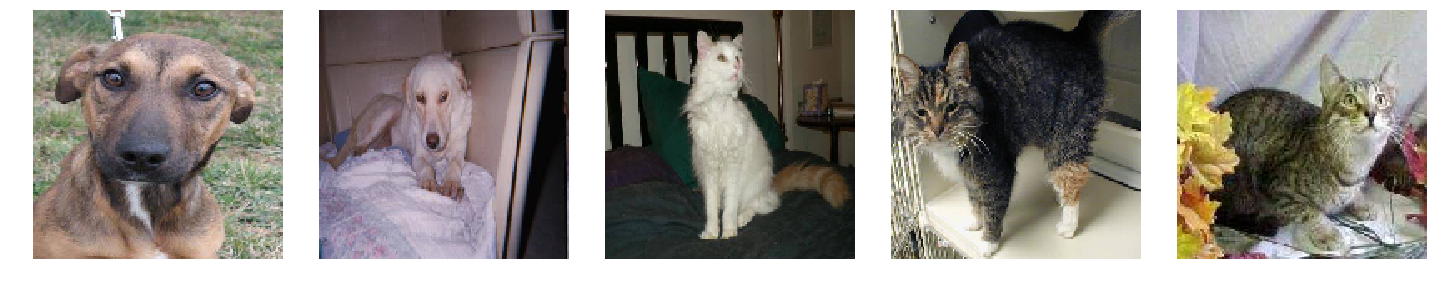

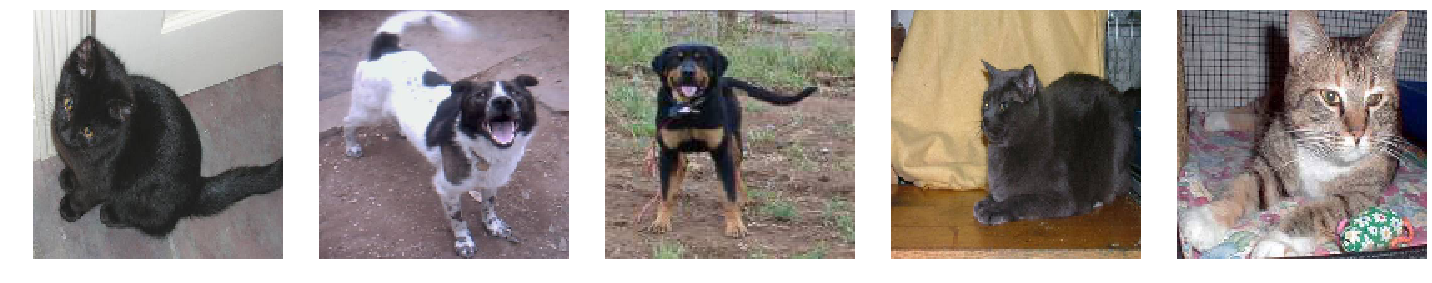

[1. 1. 0. 0. 0.]
[0. 1. 1. 0. 0.]


In [46]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# next関数とは、イテレータ内から要素を取り出すための関数です。
sample_training_images, label_train  = next(train_data_gen) 
plotImages(sample_training_images[:5])
sample_validation_images, label_val  = next(val_data_gen) 
plotImages(sample_validation_images[:5])
# print(sample_training_images[0])
# print(type(label_train[:5]))
print(label_train[:5])
# print(len(label_train)) # バッチサイズである128のデータ
print(label_val[:5])
# print(len(label_val)) # バッチサイズである128のデータ

In [47]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [60]:
print(total_train // batch_size)
print(total_val // batch_size)


15
7


In [62]:
history = model.fit_generator(
    train_data_gen,
    # steps_per_epoch=total_train // batch_size,
    steps_per_epoch=5,    
    epochs=epochs,
    validation_data=val_data_gen,
    # validation_steps=total_train // batch_size
    validation_steps=5  
)

Epoch 1/15
5/5 [==============================] - 7s 1s/step - loss: 0.1869 - accuracy: 0.9334 - val_loss: 0.7160 - val_accuracy: 0.7141
Epoch 2/15
5/5 [==============================] - 8s 2s/step - loss: 0.1477 - accuracy: 0.9594 - val_loss: 0.7874 - val_accuracy: 0.7109
Epoch 3/15
5/5 [==============================] - 7s 1s/step - loss: 0.1460 - accuracy: 0.9563 - val_loss: 0.8481 - val_accuracy: 0.7094
Epoch 4/15
5/5 [==============================] - 8s 2s/step - loss: 0.1568 - accuracy: 0.9416 - val_loss: 0.8257 - val_accuracy: 0.7031
Epoch 5/15
3/5 [=================>............] - ETA: 1s - loss: 0.1614 - accuracy: 0.9349

KeyboardInterrupt: 

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
 
loss = history.history['loss']
val_loss = history.history['val_loss']

print(acc)
print(val_acc)


[0.5275974273681641, 0.596875011920929, 0.53125, 0.6937500238418579, 0.651562511920929, 0.682812511920929, 0.6850649118423462, 0.7353895902633667, 0.7808441519737244, 0.793749988079071, 0.8051947951316833, 0.8214285969734192, 0.8685064911842346, 0.832812488079071, 0.870312511920929]
[0.6468750238418579, 0.5140625238418579, 0.660937488079071, 0.6640625, 0.675000011920929, 0.6312500238418579, 0.651562511920929, 0.6796875, 0.6734374761581421, 0.71875, 0.7281249761581421, 0.7015625238418579, 0.731249988079071, 0.6968749761581421, 0.6875]


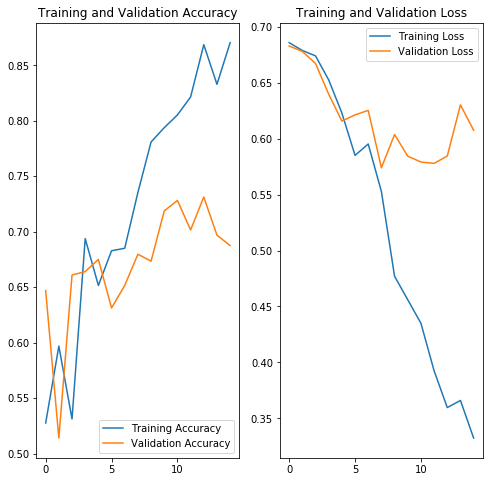

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
 
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs_range = range(epochs)
 
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
 
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()